1. Implement Decision tree using CART algorithm. 


In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
X, y = iris.data, iris.target  # type:ignore

In [5]:
X_ = pd.DataFrame(
    X,
    columns=iris["feature_names"], # type: ignore
)

In [6]:
X_["target"] = y

In [7]:
X_.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X[:, [2, 3]], y, test_size=0.2, random_state=42
)

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [11]:
model = DecisionTreeClassifier(criterion="gini")
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [12]:
y_pred = model.predict(X_test)

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [14]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

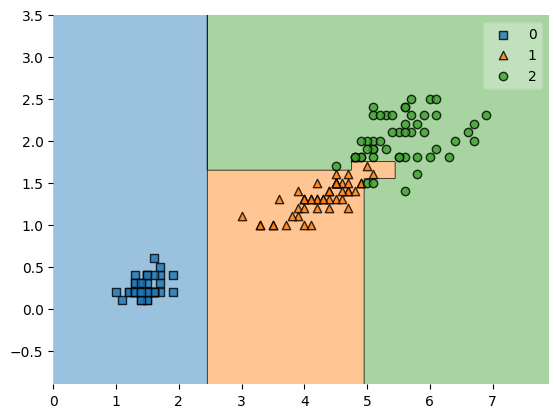

In [15]:
plot_decision_regions(X[:,[2,3]], y, model)

2. Implement rule-based classification using OneR algorithm. 

In [18]:
import pandas as pd

In [19]:
data = {
    "Outlook": [
        "Sunny",
        "Sunny",
        "Overcast",
        "Rain",
        "Rain",
        "Rain",
        "Overcast",
        "Sunny",
    ],
    "Temperature": ["Hot", "Hot", "Hot", "Mild", "Cool", "Cool", "Cool", "Mild"],
    "Humidity": ["High", "High", "High", "High", "Normal", "Normal", "Normal", "High"],
    "Wind": ["Weak", "Strong", "Weak", "Weak", "Weak", "Strong", "Strong", "Weak"],
    "Play": ["No", "No", "Yes", "Yes", "Yes", "No", "Yes", "No"],
}

df = pd.DataFrame(data)

In [20]:

def oneR(df, target):
    features = [col for col in df.columns if col != target]
    best_feature = None
    min_error = float("inf")
    best_rule = {}

    for feature in features:
        rule = {}
        for value, group in df.groupby(feature):
            # Most frequent class for this value
            most_common_class = group[target].mode()[0]
            rule[value] = most_common_class

        # Calculate error
        predictions = df[feature].map(rule)
        error = sum(predictions != df[target])

        print(f"\nFeature: {feature}")
        print(f"Rule: {rule}")
        print(f"Error: {error}")

        if error < min_error:
            min_error = error
            best_feature = feature
            best_rule = rule

    print("\n✅ Best Feature:", best_feature)
    print("📘 Rule:", best_rule)
    print("🔢 Total Errors:", min_error)

    return best_feature, best_rule


best_feature, best_rule = oneR(df, "Play")


Feature: Outlook
Rule: {'Overcast': 'Yes', 'Rain': 'Yes', 'Sunny': 'No'}
Error: 1

Feature: Temperature
Rule: {'Cool': 'Yes', 'Hot': 'No', 'Mild': 'No'}
Error: 3

Feature: Humidity
Rule: {'High': 'No', 'Normal': 'Yes'}
Error: 3

Feature: Wind
Rule: {'Strong': 'No', 'Weak': 'Yes'}
Error: 3

✅ Best Feature: Outlook
📘 Rule: {'Overcast': 'Yes', 'Rain': 'Yes', 'Sunny': 'No'}
🔢 Total Errors: 1
